Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install idx2numpy
import idx2numpy
from google.colab import files

In [ ]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [ ]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = ''
training_images_filepath = join(input_path, '/content/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, '/content/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, '/content/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, '/content/t10k-labels.idx1-ubyte')


#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

#show_images(images_2_show, titles_2_show)


Removing Bad Data
mislabeled data is found using the cleanlab code in 'CleanLabMNIST.ipynb'

In [ ]:
mislabel_indices = [59915, 24798, 8729, 31134, 19124, 37427, 27522, 26471, 53638, 6848, 2720, 23824, 2676, 20672, 8200, 10852, 63520, 27155, 53216, 56480, 20773, 15434, 49543, 11781, 37834, 25678, 59719, 1244, 14582, 34802, 51944, 30049, 902, 35234, 44848, 12183, 9472, 15842, 61014, 37038, 1604, 66597, 22438, 26560, 39184, 25800, 6448, 28392, 21348, 43454, 33162, 14968, 43658, 55792, 16376, 41538, 54506, 40386, 65955, 31596, 42566, 8268, 31198, 40378, 42472, 1341, 29238, 47264, 34404, 45143, 18704, 49212, 43109, 8904, 20572, 68094, 5554, 28162, 43818, 7080, 44456, 63767, 19244, 36104, 50340, 11702, 46269, 41284, 4334, 51248, 25829, 53623, 69009, 33062, 19360, 12268, 2098, 11210, 41594, 11570, 61299, 35851, 26504, 4502, 61681, 26629, 42941, 26444, 33768, 25015, 13703, 15106, 28422, 47034, 494, 50329, 34058, 60947, 42854, 8104, 4945, 23730, 8966, 56596, 61754, 39863, 44959, 37734, 45427, 40144, 26626, 12372, 12559, 12679, 29991, 26748, 13082, 43208, 21576, 30968, 11104, 25716, 41998, 19365, 10277, 17551, 5216, 47094]
mislabel_indices.sort(reverse=True)
print(mislabel_indices)
sorted_errors_train = [59915, 59719, 56596, 56480, 55792, 54506, 53638, 53623, 53216, 51944, 51248, 50340, 50329, 49543, 49212, 47264, 47094, 47034, 46269, 45427, 45143, 44959, 44848, 44456, 43818, 43658, 43454, 43208, 43109, 42941, 42854, 42566, 42472, 41998, 41594, 41538, 41284, 40386, 40378, 40144, 39863, 39184, 37834, 37734, 37427, 37038, 36104, 35851, 35234, 34802, 34404, 34058, 33768, 33162, 33062, 31596, 31198, 31134, 30968, 30049, 29991, 29238, 28422, 28392, 28162, 27522, 27155, 26748, 26629, 26626, 26560, 26504, 26471, 26444, 25829, 25800, 25716, 25678, 25015, 24798, 23824, 23730, 22438, 21576, 21348, 20773, 20672, 20572, 19365, 19360, 19244, 19124, 18704, 17551, 16376, 15842, 15434, 15106, 14968, 14582, 13703, 13082, 12679, 12559, 12372, 12268, 12183, 11781, 11702, 11570, 11210, 11104, 10852, 10277, 9472, 8966, 8904, 8729, 8268, 8200, 8104, 7080, 6848, 6448, 5554, 5216, 4945, 4502, 4334, 2720, 2676, 2098, 1604, 1341, 1244, 902, 494]
sorted_errors_test = [9009, 8094, 6597, 5955, 3767, 3520, 1754, 1681, 1299, 1014, 947]

[69009, 68094, 66597, 65955, 63767, 63520, 61754, 61681, 61299, 61014, 60947, 59915, 59719, 56596, 56480, 55792, 54506, 53638, 53623, 53216, 51944, 51248, 50340, 50329, 49543, 49212, 47264, 47094, 47034, 46269, 45427, 45143, 44959, 44848, 44456, 43818, 43658, 43454, 43208, 43109, 42941, 42854, 42566, 42472, 41998, 41594, 41538, 41284, 40386, 40378, 40144, 39863, 39184, 37834, 37734, 37427, 37038, 36104, 35851, 35234, 34802, 34404, 34058, 33768, 33162, 33062, 31596, 31198, 31134, 30968, 30049, 29991, 29238, 28422, 28392, 28162, 27522, 27155, 26748, 26629, 26626, 26560, 26504, 26471, 26444, 25829, 25800, 25716, 25678, 25015, 24798, 23824, 23730, 22438, 21576, 21348, 20773, 20672, 20572, 19365, 19360, 19244, 19124, 18704, 17551, 16376, 15842, 15434, 15106, 14968, 14582, 13703, 13082, 12679, 12559, 12372, 12268, 12183, 11781, 11702, 11570, 11210, 11104, 10852, 10277, 9472, 8966, 8904, 8729, 8268, 8200, 8104, 7080, 6848, 6448, 5554, 5216, 4945, 4502, 4334, 2720, 2676, 2098, 1604, 1341, 1244

In [ ]:
#Removing error data images
clean_x_train = np.delete(x_train, sorted_errors_train, axis=0)
clean_y_train = np.delete(y_train, sorted_errors_train, axis=0)
clean_x_test = np.delete(x_test, sorted_errors_test, axis=0)
clean_y_test = np.delete(y_test, sorted_errors_test, axis=0)

In [ ]:
#convert dataset to .idx1 file
idx2numpy.convert_to_file('clean_x_train.idx1-ubyte', clean_x_train)
idx2numpy.convert_to_file('clean_y_train.idx1-ubyte', clean_y_train)
idx2numpy.convert_to_file('clean_x_test.idx1-ubyte', clean_x_test)
idx2numpy.convert_to_file('clean_y_test.idx1-ubyte', clean_y_test)

# Download the updated files
files.download('clean_x_train.idx1-ubyte')
files.download('clean_y_train.idx1-ubyte')
files.download('clean_x_test.idx1-ubyte')
files.download('clean_y_test.idx1-ubyte')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

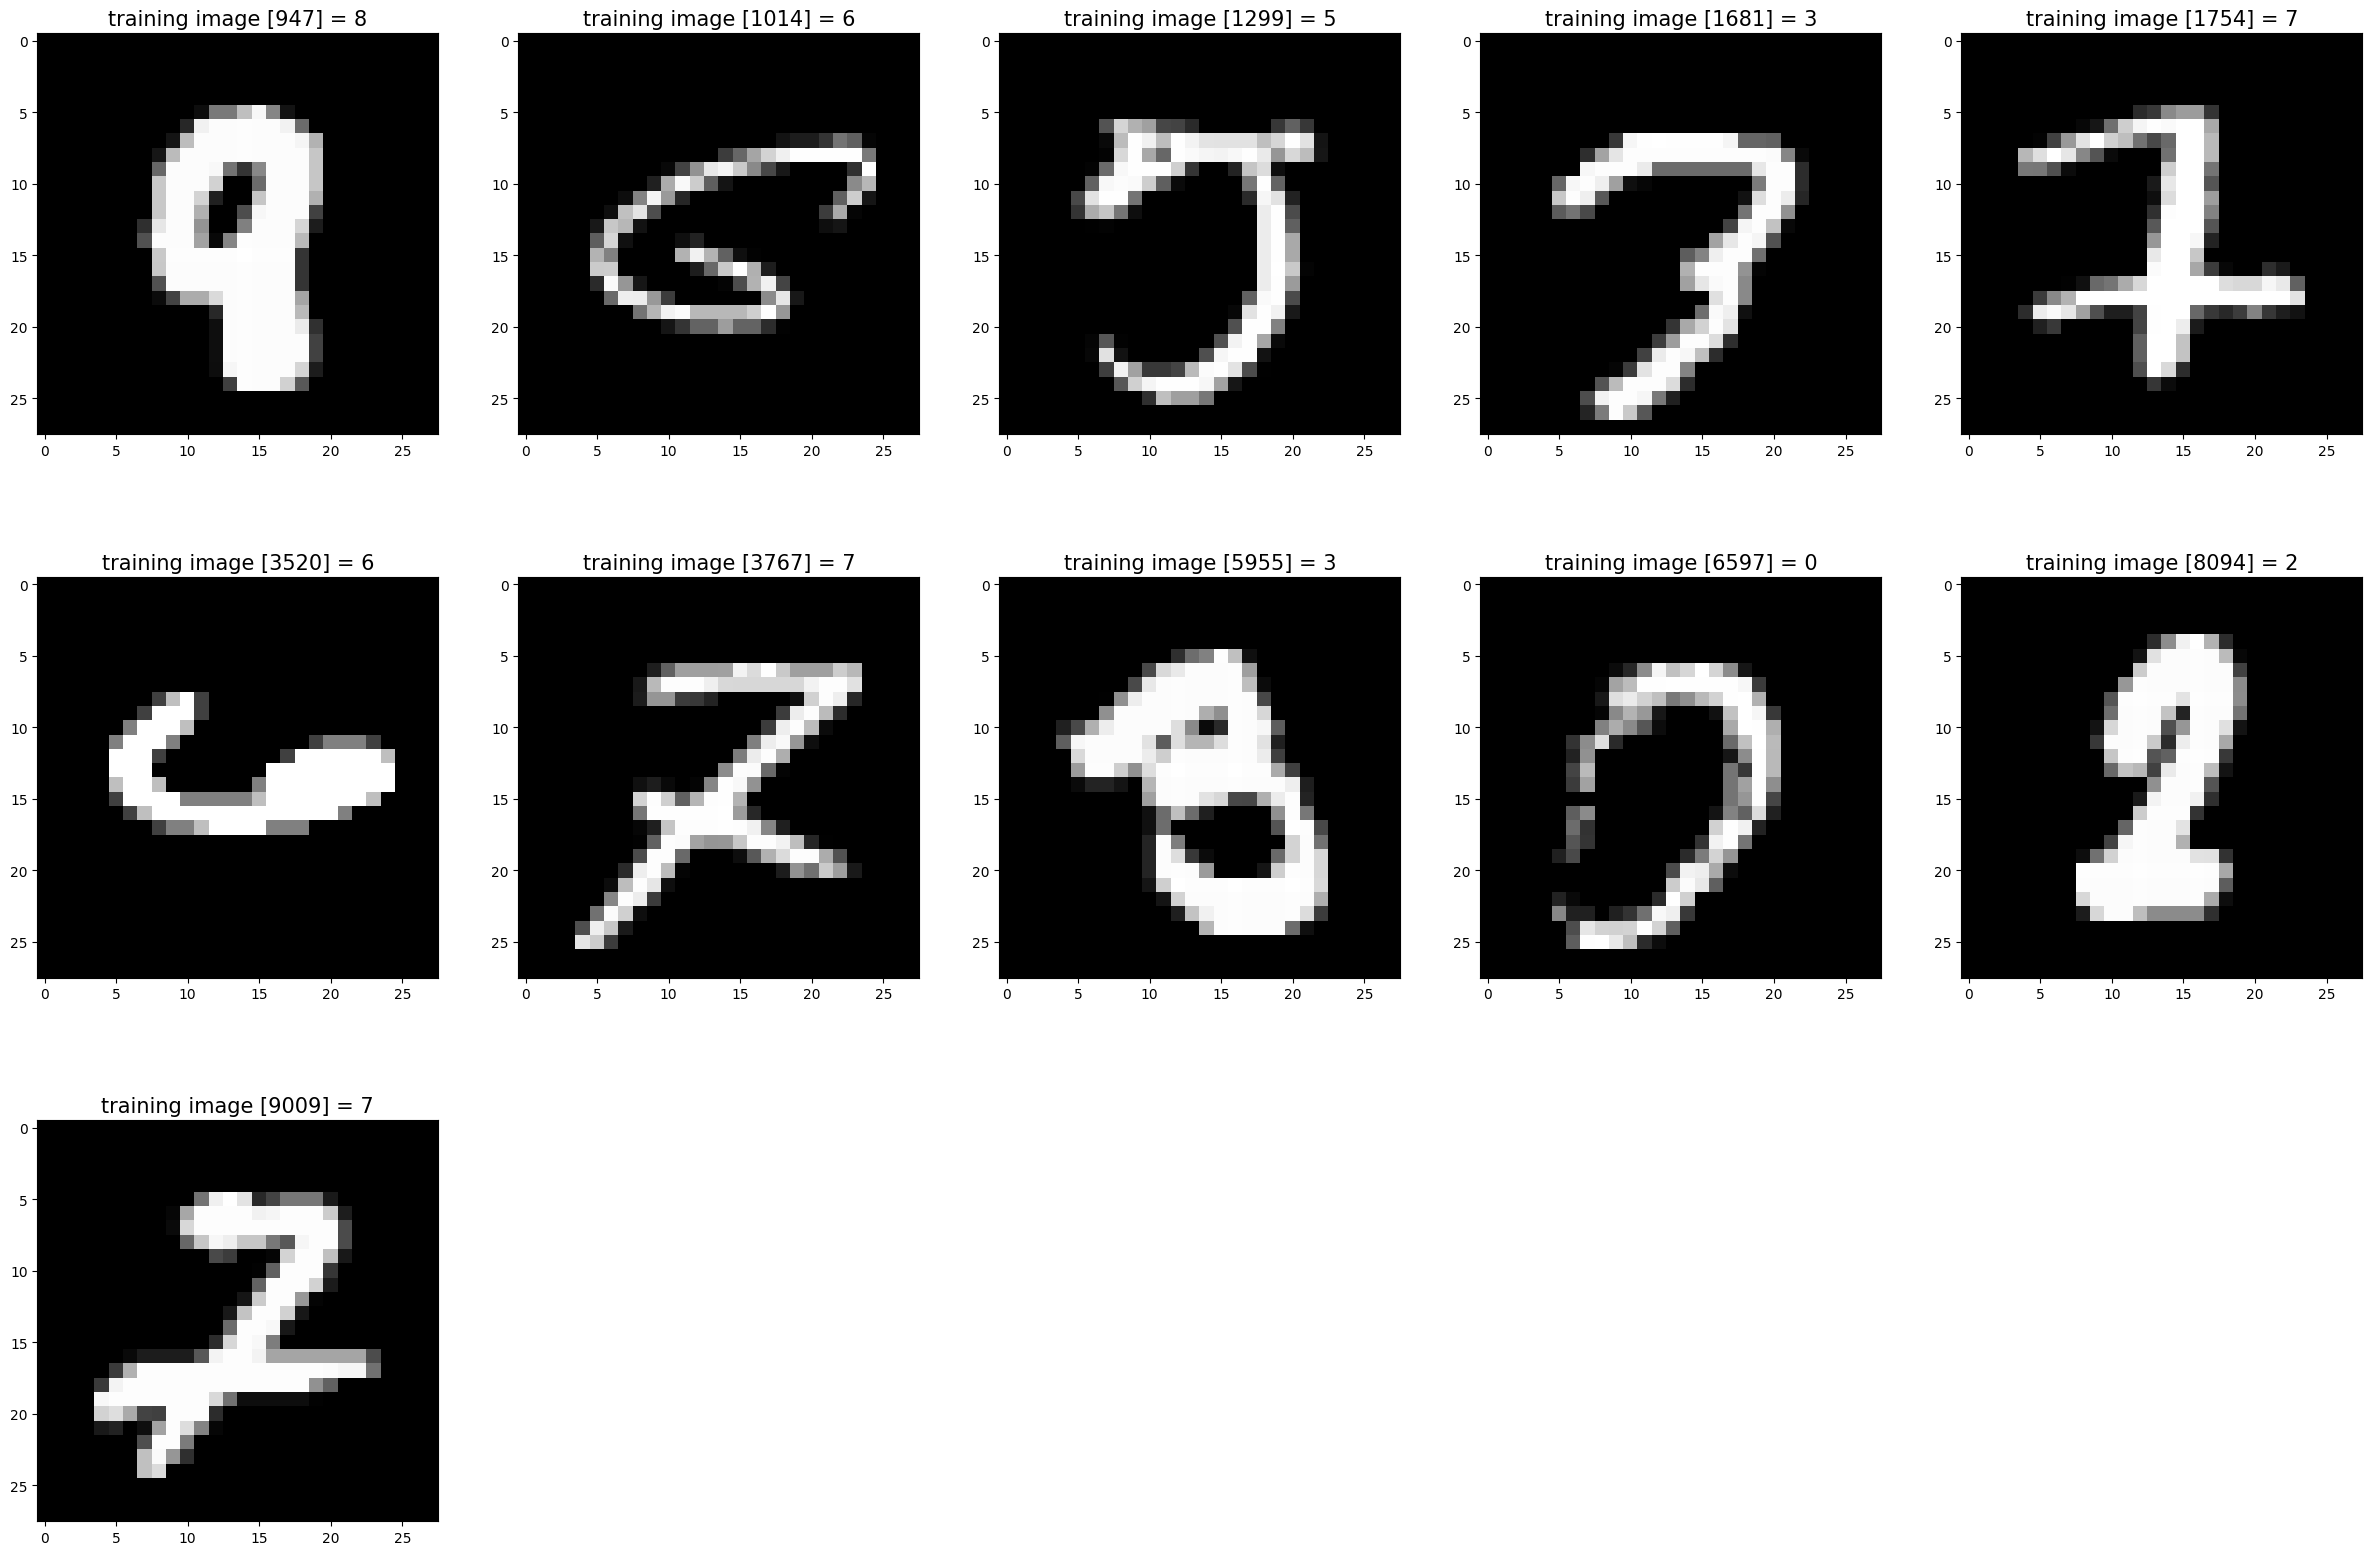

In [ ]:
#display error data in test dataset
images_2_show2 = []
titles_2_show2 = []
errors = [947, 1014, 1299, 1681, 1754, 3520, 3767, 5955, 6597, 8094, 9009]
for i in errors:
    r = i
    images_2_show2.append(x_test[r])
    titles_2_show2.append('training image [' + str(r) + '] = ' + str(y_test[r]))
show_images(images_2_show2, titles_2_show2)

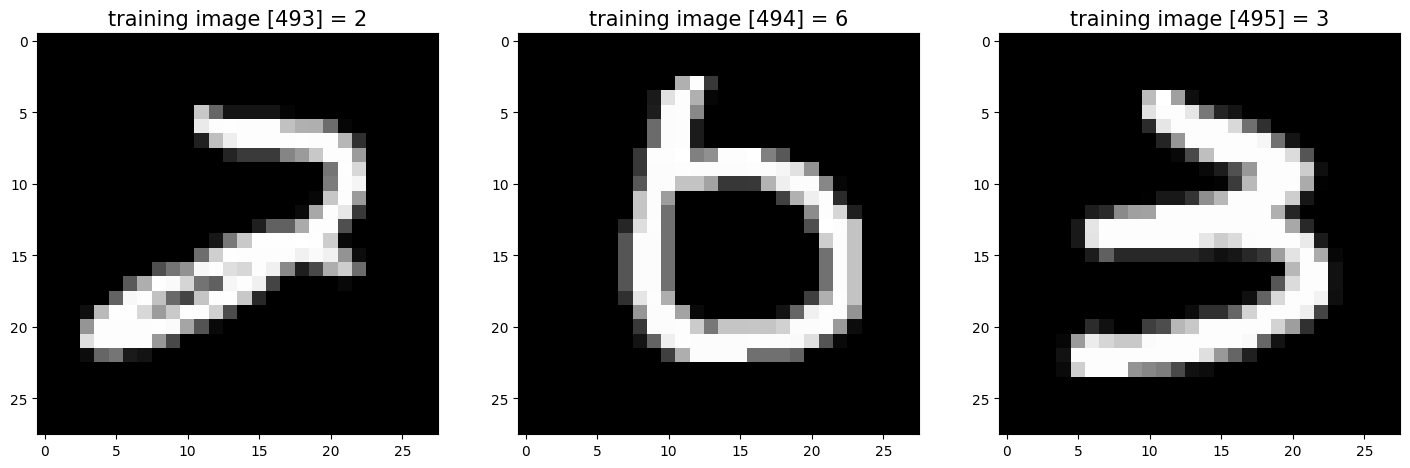

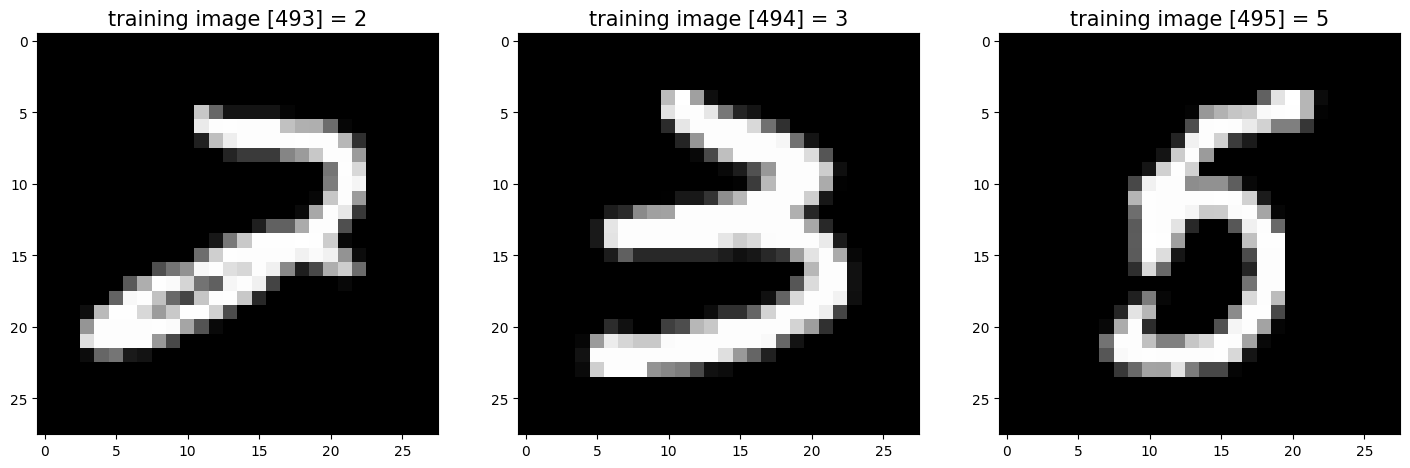

In [ ]:

#sample to see erroneos image
images_2_show2 = []
titles_2_show2 = []
errors = [493,494,495]
for i in errors:
    r = i
    images_2_show2.append(x_train[r])
    titles_2_show2.append('training image [' + str(r) + '] = ' + str(y_train[r]))
show_images(images_2_show2, titles_2_show2)

#sample to see image gone
images_2_show3 = []
titles_2_show3 = []
mislabel_indices = [494]
for i in errors:
    r = i
    images_2_show3.append(clean_x_train[r])
    titles_2_show3.append('training image [' + str(r) + '] = ' + str(clean_y_train[r]))
show_images(images_2_show3, titles_2_show3)